In [1]:
import numpy as np
import pandas as pd

## Loading data

In [2]:
df = pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Preprocessing

In [3]:
df.shape

(545, 13)

In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [9]:
df.corr()['price'].sort_values(ascending=False)

<ipython-input-9-975b53e39be7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values(ascending=False)


price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64

## Data visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
df['bedrooms'].unique()

array([4, 3, 5, 2, 6, 1])

In [13]:
df['bathrooms'].unique()

array([2, 4, 1, 3])

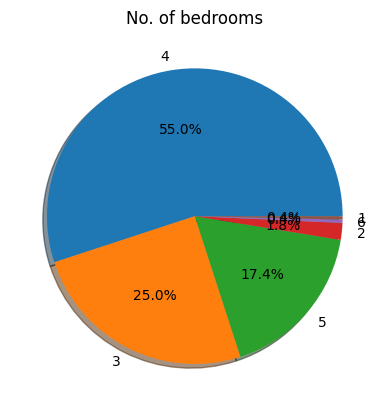

In [14]:
plt.pie(df['bedrooms'].value_counts(),labels=['4','3','5','2','6','1'],autopct='%1.1f%%',shadow=True)
plt.title('No. of bedrooms')
plt.show()

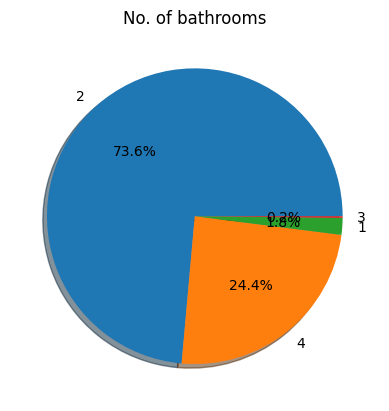

In [15]:
plt.pie(df['bathrooms'].value_counts(),labels=['2','4','1','3'],autopct='%1.1f%%',shadow=True)
plt.title('No. of bathrooms')
plt.show()

In [16]:
df['stories'].unique()

array([3, 4, 2, 1])

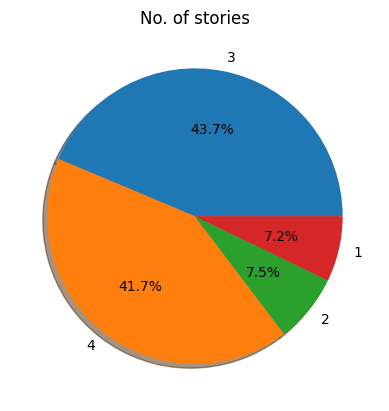

In [17]:
plt.pie(df['stories'].value_counts(),labels=['3','4','2','1'],autopct='%1.1f%%',shadow=True)
plt.title('No. of stories')
plt.show()

In [18]:
df['mainroad'].unique()

array(['yes', 'no'], dtype=object)

<Axes: ylabel='mainroad'>

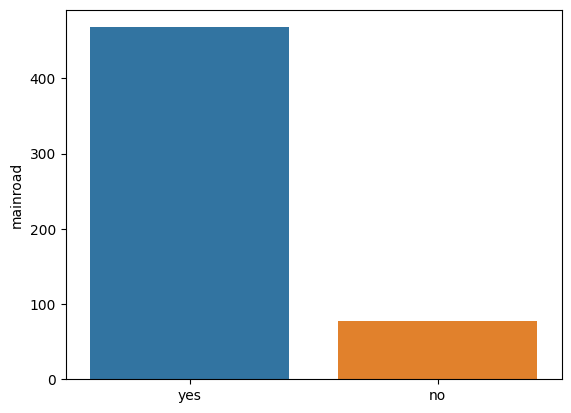

In [19]:
sns.barplot(x=df['mainroad'].value_counts().index,y=df['mainroad'].value_counts())

In [20]:
df['guestroom'].unique()

array(['no', 'yes'], dtype=object)

<Axes: ylabel='guestroom'>

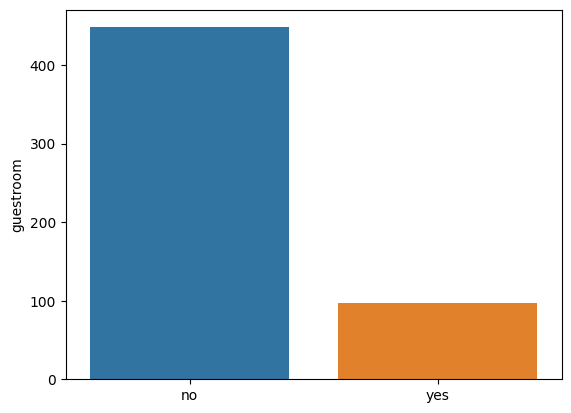

In [21]:
sns.barplot(x=df['guestroom'].value_counts().index,y=df['guestroom'].value_counts())

<Axes: ylabel='basement'>

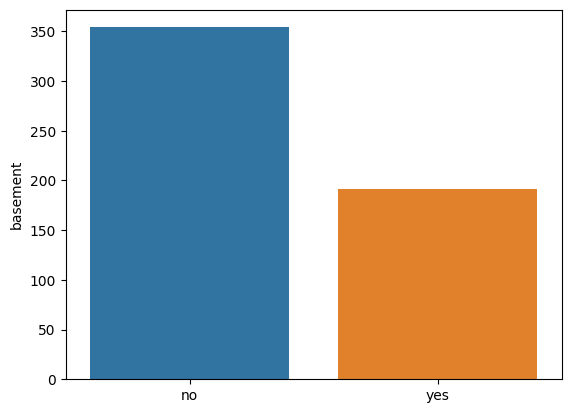

In [22]:
sns.barplot(x=df['basement'].value_counts().index,y=df['basement'].value_counts())

<Axes: ylabel='hotwaterheating'>

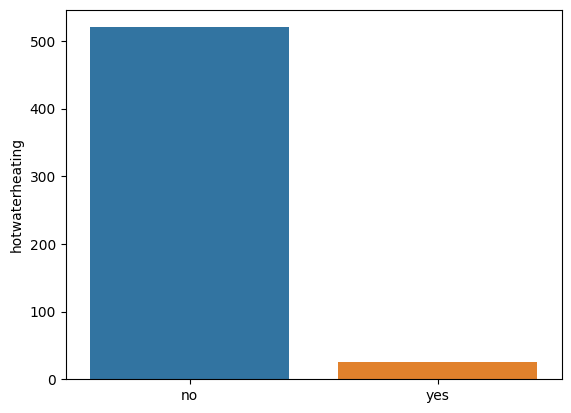

In [23]:
sns.barplot(x=df['hotwaterheating'].value_counts().index,y=df['hotwaterheating'].value_counts())

<Axes: ylabel='airconditioning'>

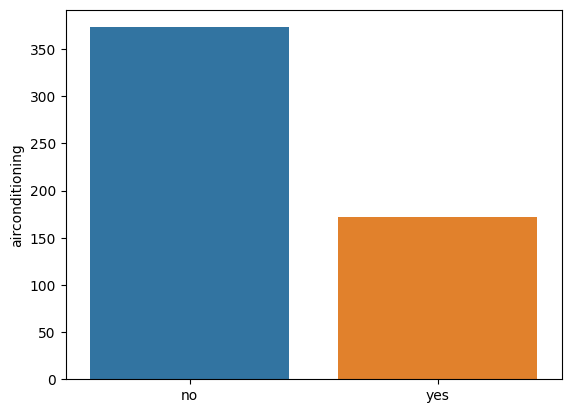

In [24]:
sns.barplot(x=df['airconditioning'].value_counts().index,y=df['airconditioning'].value_counts())

In [25]:
df['parking'].unique()

array([2, 3, 0, 1])

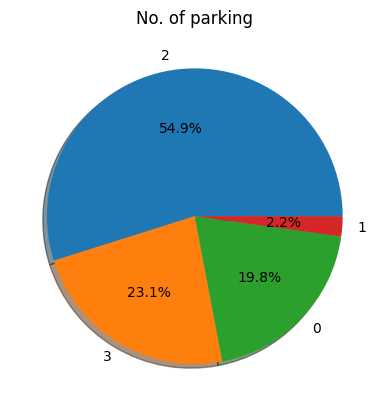

In [26]:
plt.pie(df['parking'].value_counts(),labels=['2','3','0','1'],autopct='%1.1f%%',shadow=True)
plt.title('No. of parking')
plt.show()

In [27]:
df['prefarea'].unique()

array(['yes', 'no'], dtype=object)

<Axes: ylabel='prefarea'>

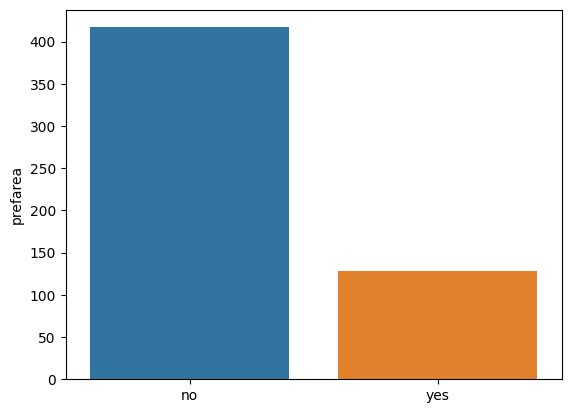

In [28]:
sns.barplot(x=df['prefarea'].value_counts().index,y=df['prefarea'].value_counts())

In [29]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

<Axes: ylabel='furnishingstatus'>

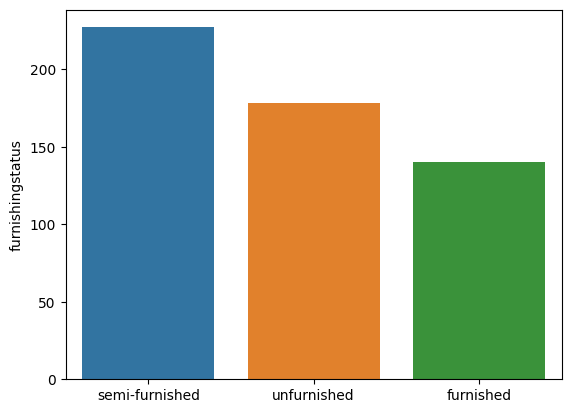

In [30]:
sns.barplot(x=df['furnishingstatus'].value_counts().index,y=df['furnishingstatus'].value_counts())

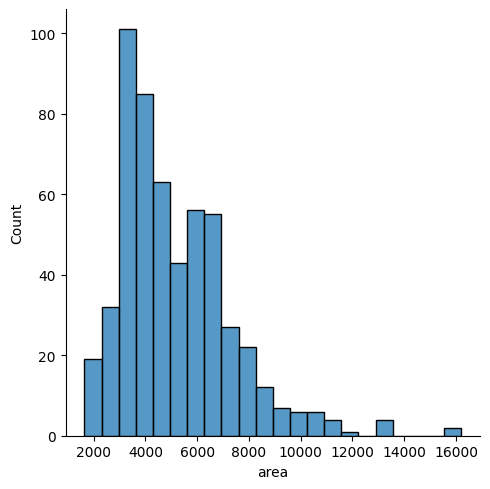

In [31]:
sns.displot(df['area'])

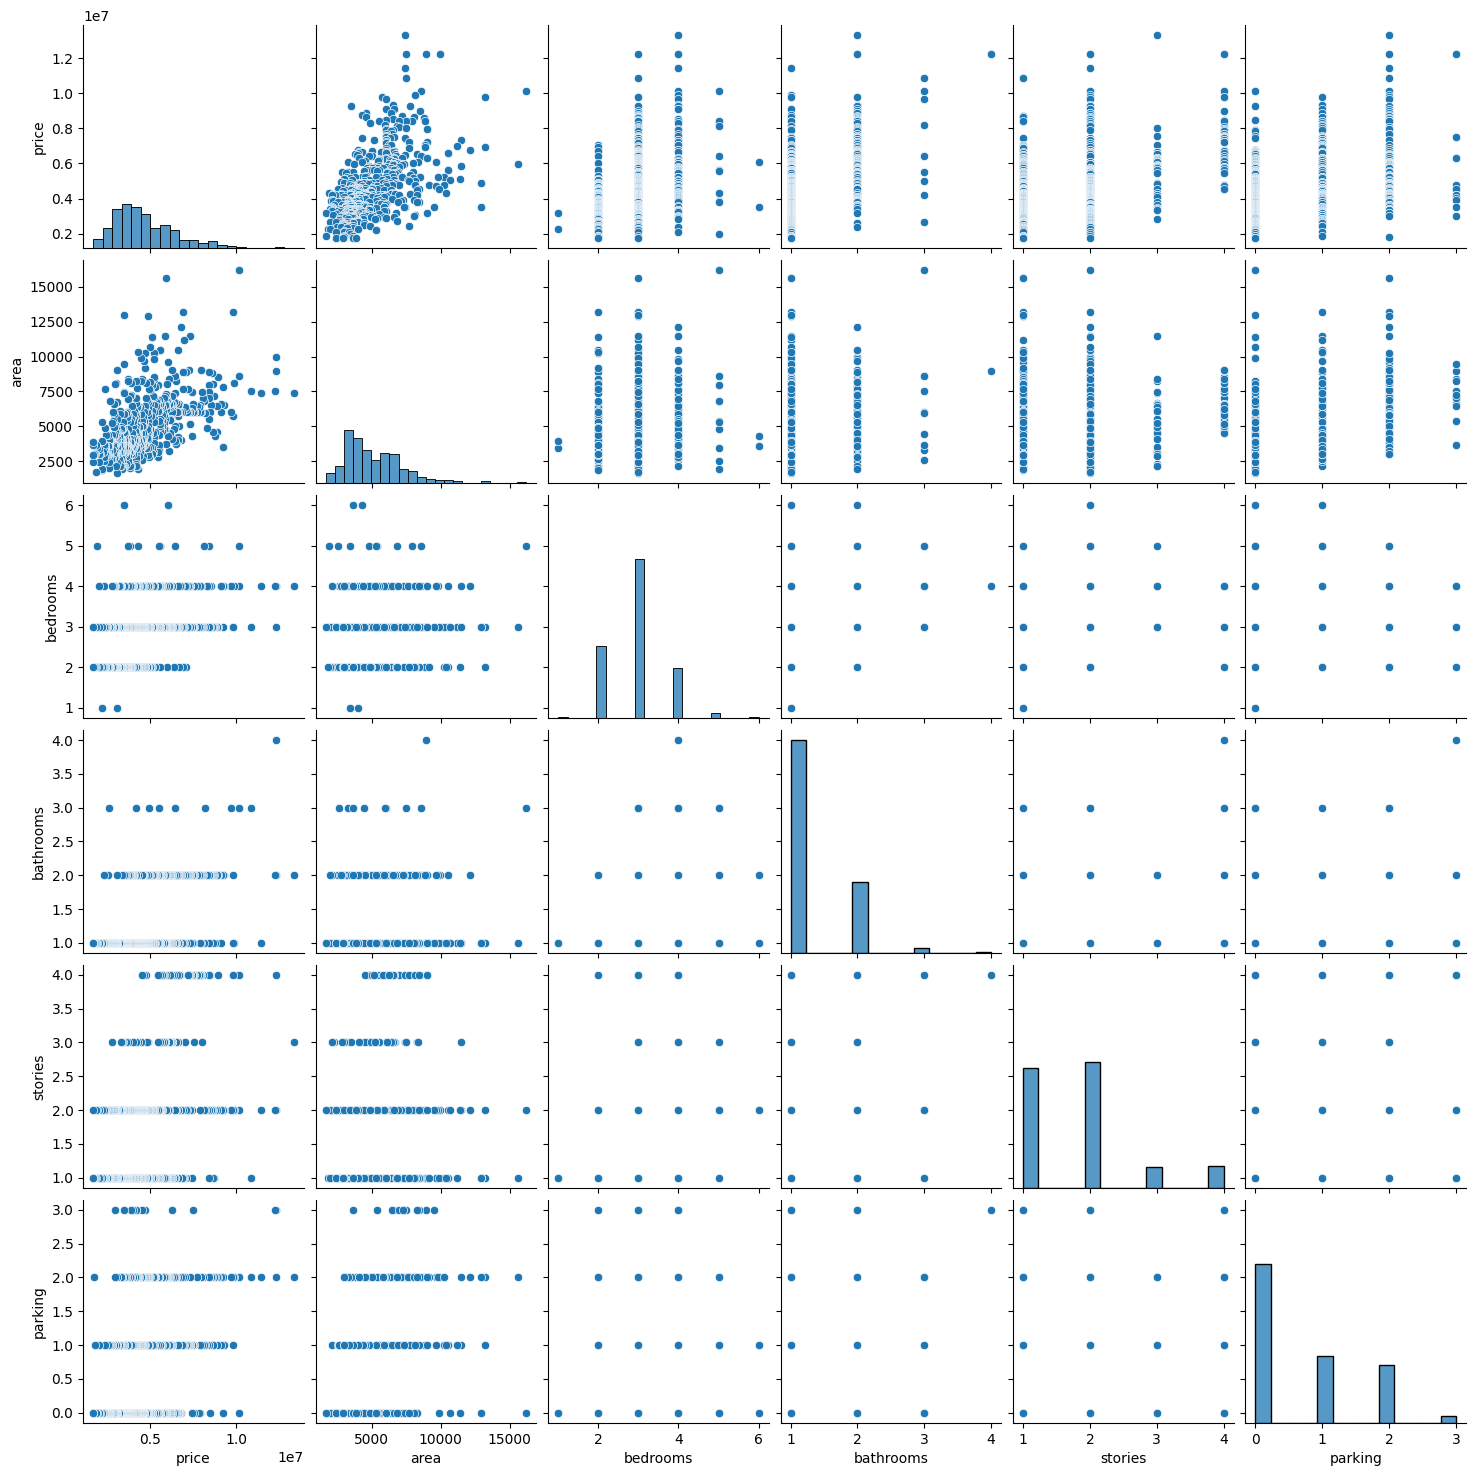

In [32]:
sns.pairplot(df)

<ipython-input-33-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

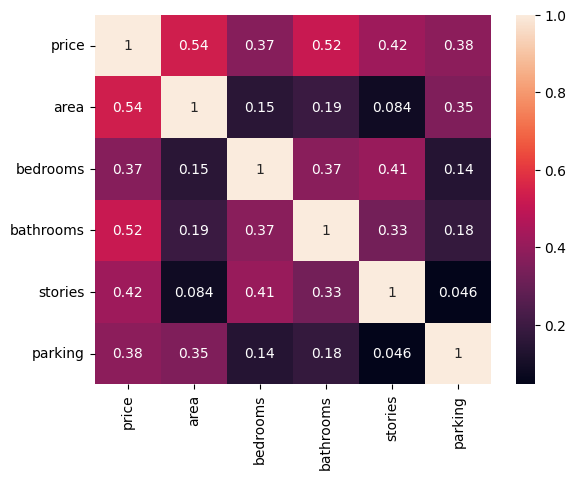

In [33]:
sns.heatmap(df.corr(),annot=True)

## Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()

In [36]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [37]:
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

In [38]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


## x and y split

In [39]:
y = df['price']
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [40]:
x = df.drop(columns = ['price'],axis = 1)
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


## Train test split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [43]:
x_train.shape,y_train.shape

((381, 12), (381,))

In [44]:
x_test.shape,y_test.shape

((164, 12), (164,))

## ANN Regression model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [46]:
regressor = Sequential()
regressor.add(Dense(12, activation='relu'))
regressor.add(Dense(12, activation='relu'))
regressor.add(Dense(8, activation='relu'))
regressor.add(Dense(9, activation='relu'))
regressor.add(Dense(1, activation='linear'))

In [47]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [48]:
regressor.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
39/39 [==============================] - 1s 3ms/step - loss: 25812059291648.0000
Epoch 2/100
39/39 [==============================] - 0s 2ms/step - loss: 25796842356736.0000
Epoch 3/100
39/39 [==============================] - 0s 2ms/step - loss: 25763118055424.0000
Epoch 4/100
39/39 [==============================] - 0s 2ms/step - loss: 25687836590080.0000
Epoch 5/100
39/39 [==============================] - 0s 2ms/step - loss: 25523296141312.0000
Epoch 6/100
39/39 [==============================] - 0s 2ms/step - loss: 25183272304640.0000
Epoch 7/100
39/39 [==============================] - 0s 2ms/step - loss: 24579426746368.0000
Epoch 8/100
39/39 [==============================] - 0s 3ms/step - loss: 23519872155648.0000
Epoch 9/100
39/39 [==============================] - 0s 3ms/step - loss: 21829771067392.0000
Epoch 10/100
39/39 [==============================] - 0s 2ms/step - loss: 19366645071872.0000
Epoch 11/100
39/39 [==============================] - 0s 2ms/step - l

In [49]:
y_pred = regressor.predict(x_test)
y_pred

6/6 [==============================] - 0s 3ms/step


array([[ 4954158.5],
       [ 5455389.5],
       [ 3389358. ],
       [ 4197280.5],
       [ 3322821. ],
       [ 5632781. ],
       [ 7139220.5],
       [ 4194178.5],
       [ 2722849.2],
       [ 2267879.5],
       [ 7203270.5],
       [ 3301947.5],
       [ 3123226. ],
       [ 2607480.8],
       [ 3337569.8],
       [ 3054993. ],
       [ 1685831.9],
       [ 5035682.5],
       [ 4910495.5],
       [ 5028043. ],
       [ 4220683.5],
       [ 5725859. ],
       [ 3063669.5],
       [ 3199452. ],
       [ 6916043.5],
       [ 8349812.5],
       [ 2599734.8],
       [ 2527469. ],
       [11057342. ],
       [ 2520683. ],
       [ 3366319. ],
       [ 2626122. ],
       [ 5037481.5],
       [ 5545826.5],
       [ 4010242. ],
       [ 3865781.5],
       [ 3905294. ],
       [ 2680337.5],
       [ 2924131.2],
       [ 2347523.2],
       [ 6687261. ],
       [ 3049481.8],
       [ 5388504.5],
       [ 3526646. ],
       [ 5655090.5],
       [ 4935931. ],
       [ 5039232.5],
       [ 3897

### Evaluation

In [50]:
from sklearn.metrics import r2_score

In [51]:
r2_score(y_test,y_pred)

0.09556055224556848

## Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lr = LinearRegression()

In [98]:
lr.fit(x_train,y_train)

LinearRegression()

In [99]:
y_pred_lr = lr.predict(x_test)

### Evaluation

In [100]:
r2_score(y_test,y_pred_lr)

0.6435419628959105

## Decision Tree Regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
dec_tree = DecisionTreeRegressor()

In [60]:
dec_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [61]:
y_pred_dec_tree = dec_tree.predict(x_test)

### Evaluation

In [62]:
r2_score(y_test,y_pred_dec_tree)

0.17618067504420198

## Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
ran_for = RandomForestRegressor()

In [65]:
ran_for.fit(x_train,y_train)

RandomForestRegressor()

In [66]:
y_pred_ran_for = ran_for.predict(x_test)

### Evaluation

In [67]:
r2_score(y_test,y_pred_ran_for)

0.5706236744797939

## Support Vector Regression

In [68]:
from sklearn.svm import SVR

In [69]:
svr = SVR()

In [70]:
svr.fit(x_train,y_train)

SVR()

In [71]:
y_pred_svr = svr.predict(x_test)

### Evaluation

In [72]:
r2_score(y_test,y_pred_svr)

-0.036172722492045395

## Gradient Boosting Regression

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
grad_reg = GradientBoostingRegressor()

In [75]:
grad_reg.fit(x_train,y_train)

GradientBoostingRegressor()

In [77]:
y_pred_grad_reg = grad_reg.predict(x_test)

### Evaluation

In [78]:
r2_score(y_test,y_pred_grad_reg)

0.634561361638952

## K-Nearest Neighbors Regression (KNN)

In [79]:
from sklearn.neighbors import KNeighborsRegressor

In [80]:
kneigh = KNeighborsRegressor()

In [81]:
kneigh.fit(x_train,y_train)

KNeighborsRegressor()

In [82]:
y_pred_kneigh = kneigh.predict(x_test)

### Evaluation

In [83]:
r2_score(y_test,y_pred_kneigh)

0.30049356546111317

## XGBoost Regressor

In [84]:
import xgboost as xgb

In [85]:
xgb_model = xgb.XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=3)

In [86]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [87]:
y_pred_xgb = xgb_model.predict(x_test)

### Evaluation

In [88]:
r2_score(y_test,y_pred_xgb)

0.6365648645292548

### Since Linear Regressor is giving the best R2_score, so it is the best model for this dataset

## Dumping the model

In [91]:
import pickle

In [101]:
with open('house_model.pkl', 'wb') as model_file:
    pickle.dump(lr, model_file)